## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(merge_data_df["Mouse ID"].unique())


249

In [13]:
# Getting the duplicate mouse by ID number that shows up for Mouse ID and Timepoint 
duplicate_df = merge_data_df[merge_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
df = merge_data_df.set_index("Mouse ID")
duplicate_df_2 = df.loc["g989"]
duplicate_df_2

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_data_df.drop_duplicates(('Mouse ID', 'Timepoint'), keep=False)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice in the clean DataFrame.
#len(cleaned_df["Mouse ID"].unique())
len(cleaned_df["Mouse ID"].unique())


249

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by drug regimen
grouped_regimen_df = cleaned_df.groupby(["Drug Regimen"])

# Calculate summary statistics
mean_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].mean()
median_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].median()
variance_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].var()
stdev_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].std()
SEM_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe
summary_df = pd.DataFrame({"Mean": mean_volume_df, 
                          "Median": median_volume_df, 
                          "Variance": variance_volume_df, 
                          "Standard Deviation": stdev_volume_df, 
                          "SEM": SEM_volume_df})

# Print summary statistics dataframe
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df = grouped_regimen_df["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
renamed_summary_statistics_df = summary_statistics_df.rename(columns={'mean': 'Mean', 'median': 'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem':'SEM'})
renamed_summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

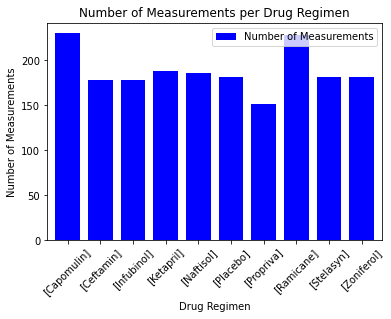

In [97]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Determine x-axis variables (drug regimens)
drug_regimen = grouped_regimen_df["Drug Regimen"].unique()

# Determine y-axis variables (number of measurements)
num_measurements = grouped_regimen_df["Mouse ID"].count()

# Create dataframe
num_measurements_df = pd.DataFrame ({'Drug Regimen': drug_regimen,'Number of Measurements': num_measurements})

# Generate and display bar plot 
num_measurements_df.plot(x='Drug Regimen', y='Number of Measurements', kind = 'bar', color = 'b', width = .75, rot = 45)

# Add title and axis labels 
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

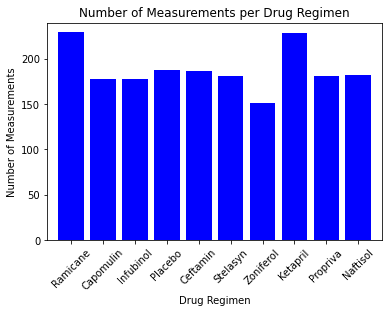

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Determine y-axis variables (number of measurements)
num_measurements = grouped_regimen_df["Mouse ID"].count()

# Determine x-axis variables (drug regimens)
drug_regimen = cleaned_df["Drug Regimen"].unique()
#does not run when changed to grouped_regimen

# Generate bar plot 
plt.bar(drug_regimen, num_measurements, color= 'b', align="center")

# Add title and axis labels 
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

# Format plot 
plt.xlim(-0.75, len(drug_regimen)-0.25)
plt.ylim(0,max(num_measurements)+10)
plt.xticks(rotation=45)

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender 
grouped_gender_df = cleaned_df.groupby(["Sex"])

# Calculate gender count
gender_count = grouped_gender_df["Mouse ID"].count()

# Create dataframe
grouped_gender_summary_df = pd.DataFrame({"Gender Count": gender_count})

# Generate pie plot using pandas
#gender_plot = grouped_gender_summary_df.plot.pie(y = gender_count, figsize = (5,5))
#gender_plot = grouped_gender_summary_df.plot(kind='pie', y = 'gender_count', title="Gender Demographics", legend=True)


KeyError: "None of [Int64Index([925, 958], dtype='int64')] are in the [columns]"

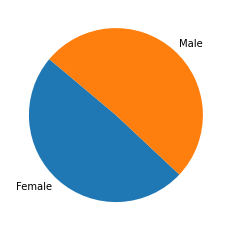

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Generate pie plot using pyplot
plt.pie(grouped_gender_summary_df["Gender Count"], labels = grouped_gender_summary_df.index, startangle=140)
plt.show()
#plt.pie(count, labels = labels, colors=colors, shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
